# SARSA Code for the Windy Gridworld

Importing the required libraries

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Creating the Windy Gridworld

In [10]:
# Defining the world parameters

# world height
world_height = 7
# world width
world_width = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

Defining the actions and states for the agent

In [11]:
# actions
action_up = 0
action_down = 1
action_left = 2
action_right = 3

# set of actions
ACTIONS = [action_up, action_down, action_left, action_right]

# states can be taken as the positions in the grid
# start state
START = [0, 3]
# goal state
GOAL = [7, 3]

SARSA parameters

In [12]:
# probability for exploration
EPSILON = 0.1
# Sarsa step size
ALPHA = 0.5
# Discount factor
GAMMA = 0.5
# reward for each step
REWARD = -1.0

Creating the step function (action in a state)

In [13]:
def step(state, action):
    i, j = state
    if action == action_up:
        return [i,min(j + 1 + WIND[i], world_height - 1)]
    elif action == action_down:
        return [i,max(min(j -1 + WIND[i], world_height - 1), 0)]
    elif action == action_left:
        return [max(i-1,0),min(j + WIND[i], world_height - 1)]
    elif action == action_right:
        return [min(i + 1, world_width - 1),min(j + WIND[i], world_height - 1)]
    else:
        assert False

Code for plotting a state

In [14]:
def state_plot(state,ep, time):
    
    '''
    This fucntion is used to plot a particular state
    And all the plots of states of an episode can used to make a simulation video
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # start state in green
    rect1 = matplotlib.patches.Rectangle((0, 3),1, 1,color ='green')
    # goal state in red
    rect2 = matplotlib.patches.Rectangle((7, 3),1, 1,color ='red')
    # agent in blue
    rect3 = matplotlib.patches.Rectangle((state[0], state[1]),1, 1,color ='blue')


    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)

    plt.xlim(0, 10)
    plt.ylim(0, 7)
    plt.grid(True)
    plt.savefig("pics/%s_%s.png" % (ep,time))

Code for an episode

In [15]:
# function for an episode
def episode(q_value,ep):
    # tracking the total time steps taken to complete the episode
    time = 0
    # initial state
    state = START
    
    # choose an action based on epsilon-greedy policy
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
        
    
    # Use this code only if you want a simulation video for the episodes
    '''
    if (ep==0 or ep==499):
        state_plot(state,ep,time)
    '''
    
    
    # keep going until the agent reaches the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            next_action = np.random.choice(ACTIONS)
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
            
            
        # Sarsa Q-value update
        q_value[state[0], state[1], action] += \
            ALPHA * (REWARD + GAMMA*q_value[next_state[0], next_state[1], next_action] -
                     q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
        
        
        # Use this code only if you want a simulation video for the episodes
        '''
        if (ep==0 or ep==499):
            state_plot(state,ep,time)
        '''
        
        
    return time

1. Running 500 episodes
2. Generating the episodes vs timesteps graph

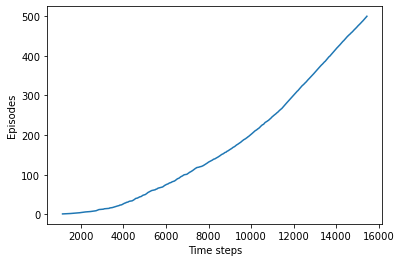

Optimal policy is:
['D', 'R', 'R', 'L', 'U', 'U', 'U', 'U', 'L', 'U']
['R', 'D', 'R', 'R', 'R', 'U', 'U', 'R', 'L', 'U']
['U', 'R', 'R', 'R', 'D', 'R', 'U', 'D', 'L', 'L']
['R', 'R', 'R', 'R', 'R', 'R', 'L', 'G', 'U', 'D']
['R', 'D', 'R', 'R', 'R', 'R', 'U', 'L', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [16]:
def SARSA_plot():
    
    # Initializing the q-values
    q_value = np.zeros((world_width, world_height, 4))
    # Number of episodes
    episode_limit = 500
    steps = []
    ep = 0
    while ep < episode_limit:
        steps.append(episode(q_value,ep))
        # time = episode(q_value)
        # episodes.extend([ep] * time)
        ep += 1
        
    # cummulative values of time steps
    steps = np.add.accumulate(steps)
    
    # Plotting
    plt.plot(steps, np.arange(1, len(steps) + 1))
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')
    plt.savefig('SARSA_EPvsTS.png')
    plt.show()
    plt.close()
    
    
    
    # Finding and printing the optimal policy
    optimal_policy = []
    for j in range(0, world_height):
        optimal_policy.append([])
        for i in range(0, world_width):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue
            bestAction = np.argmax(q_value[i, j, :])
            if bestAction == action_up:
                optimal_policy[-1].append('U')
            elif bestAction == action_down:
                optimal_policy[-1].append('D')
            elif bestAction == action_left:
                optimal_policy[-1].append('L')
            elif bestAction == action_right:
                optimal_policy[-1].append('R')
    print('Optimal policy is:')
    for row in optimal_policy:
        print(row)
    print('Wind strength for each column:\n{}'.format([str(w) for w in WIND]))
    
    return q_value
if __name__ == '__main__':
    SARSA_plot()

# The End